<h1><p style="text-align: center; font-weight: bold;"><p style="text-align: center; font-weight: bold;">Stock Market Prediction Algorithm Using an LSTM Model</p></h1>
<p style="text-align: center; font-weight: bold;">Done By Ethan Alexander Gounder</p>
<p style="text-align: center; font-weight: bold;">Email: ethangounder4@gmail.com</p>

<br><h5>Disclaimer of Liability

The stock price predictions generated by this model are for educational and research purposes only. They should not be construed as financial advice or used as the sole basis for making investment decisions.

* No Guarantees: This model provides probabilistic forecasts, not guarantees. Past performance is not indicative of future results.

* High Risk: Stock markets are volatile. Always consult a licensed financial advisor before making investment decisions.

* No Liability: The creator(s) of this model are not responsible for any financial losses incurred from using these predictions.

* User Responsibility: You assume all risks associated with the use of this tool. Investments may lose value.

By using this model, you acknowledge that you have read this disclaimer and agree to use it at your own risk.</h5></br>
This program will use an Artificial Neural Network called Long Short Term Memory to predict the closing Stock Price of a company using the past 60 day stock price.

<figure>
<img src="1_60YWl37JyS8YEBa1_dSDgw.png" title="Image Displaying the structure of a LSTM">
<figcaption><p style="text-align: center; font-weight: bold;">Image Displaying the Structure of a LSTM</p></figcaption>
</figure>


What is an LSTM?
* A type of Recurrent Neural Network that is designed to avoid the vanishing gradient program
* Long Short-Term Memory Uses TWO separate paths to make future predictions
* One path is for Long-Term Memories
* And the other path is for Short-Term Memories
* They have feedback connections that allows them to process sequencies of data
* LSTMs are well-suited for tasks involving sequential data and long-term dependencies

The code below displays the required libraries used to run the code

### Importing Required Libraries

The following code cell imports all the necessary libraries for data manipulation, visualization, preprocessing, and building the LSTM neural network model:

- **math**: For mathematical operations.
- **yfinance**: To download historical stock data.
- **numpy**: For numerical computations and array manipulations.
- **pandas**: For data handling and analysis.
- **sklearn.preprocessing.MinMaxScaler**: For scaling data to a specific range.
- **keras.models.Sequential & keras.layers**: For building and training the LSTM neural network.
- **matplotlib.pyplot**: For plotting and visualizing data.

In [ ]:
# Import necessary libraries for data processing, visualization, and building the LSTM model
import math  # For mathematical operations
import yfinance as yf  # To download historical stock data
import numpy as np  # For numerical computations and array manipulations
import pandas as pd  # For data handling and analysis
from sklearn.preprocessing import MinMaxScaler  # For scaling data to a specific range
from keras.models import Sequential  # For building the neural network model
from keras.layers import Dense, LSTM  # For adding layers to the model, including LSTM and Dense layers
import matplotlib.pyplot as plt  # For plotting and visualizing data
plt.style.use('fivethirtyeight')  # Set plot style for better aesthetics

The line of code below downloads the historical data for any company listed on different stock exchanges and for which ever time period required.
You can change the Company needed, the start and end dates to your own desire
<h6>Since I am from South Africa I am focusing on the Johannesburg Stock Exchange. FEEL FREE TO CHANGE THE STOCK OPTION AND START AND END DATES</h6>

### Downloading Historical Stock Data

This cell downloads historical stock price data for a selected company using Yahoo Finance. You can change the ticker symbol, start date, and end date to analyze different stocks or time periods.
- The example uses 'SOL.JO' (Sasol Ltd on the Johannesburg Stock Exchange).
- Data includes open, high, low, close, volume, and adjusted close prices.

In [ ]:
# Download historical stock data for Sasol Ltd (SOL.JO) from Yahoo Finance
# You can change the ticker symbol, start date, and end date as needed
df = yf.download("SOL.JO", start="2012-01-01", end="2025-06-25")

C:\Users\ethan\AppData\Local\Temp\ipykernel_10760\1974876706.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^GSPC", start="2012-01-01", end="2025-06-25")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Display the shape of the dataframe to check number of rows and column
df.shape

(3388, 5)

### Checking the Shape of the Data

This cell displays the shape (number of rows and columns) of the downloaded stock data. This helps verify that the data was loaded correctly and gives an idea of the dataset size.

<h3>Visualizing the Closing Price using matplotlib graph</h3>

### Visualizing the Closing Price

This cell plots the historical closing prices of the selected stock using matplotlib. Visualizing the data helps to understand trends, patterns, and volatility before modeling.

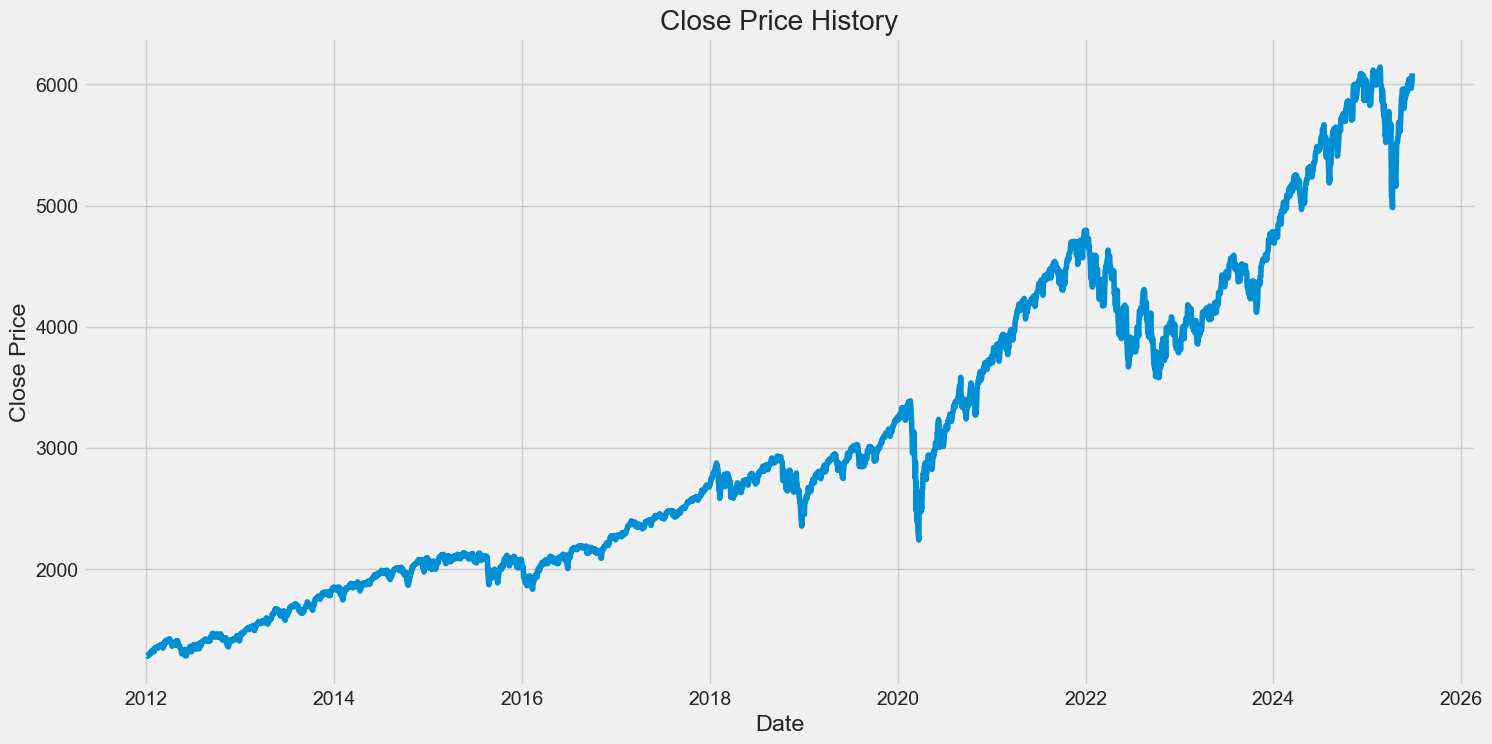

In [ ]:
# Visualize the closing price history of the stock
plt.figure(figsize=(16,8))  # Set the figure size for the plot
plt.title("Close Price History")  # Set the plot title
plt.plot(df['Close'])  # Plot the closing prices
plt.xlabel("Date")  # Label the x-axis as Date
plt.ylabel("Close Price")  # Label the y-axis as Close Price
plt.show()  # Display the plot

<h5><b>The following cell creates a new data frame using the closing prices of the original dataset and converts this to a numpy array</b></h5>

### Preparing Data for the LSTM Model

This cell creates a new dataframe containing only the closing prices, converts it to a numpy array, and determines the number of rows to use for training the LSTM model. This step is essential for preparing the data in the required format for time series prediction.

In [ ]:
# Create a new dataframe with only the 'Close' price
data = df[['Close']]  # Select only the closing price column

# Convert the dataframe to a numpy array for processing
dataset = data.values  # Convert to numpy array

# Get the number of rows to train the LSTM Model on (80% of the data)
training_data_len = math.ceil(len(dataset)*0.8)  # Calculate training data length
training_data_len  # Display the number of training samples

2711

Data Scaling


### Scaling the Data

This cell scales the closing price data to a range between 0 and 1 using MinMaxScaler. Scaling is important for neural networks to ensure faster convergence and better performance.

In [ ]:
# Scale the data to be values between 0 and 1 for neural network training
scaler = MinMaxScaler(feature_range=(0,1))  # Initialize scaler
scaled_data = scaler.fit_transform(dataset)  # Fit scaler and transform the dataset
scaled_data  # Display the scaled data

array([[0.00000000e+00],
       [4.93087743e-05],
       [8.21846345e-04],
       ...,
       [9.63775056e-01],
       [9.75554184e-01],
       [9.89322218e-01]])

<h3>Model Training</h3>

### Creating Training Datasets

This cell prepares the training data for the LSTM model. It creates sequences of 60 days of closing prices as input features (x_train) and the next day's closing price as the target (y_train). This sliding window approach helps the LSTM learn temporal dependencies.

In [ ]:
# Create the training dataset for the LSTM model
# Use the first 80% of the scaled data for training
train_data = scaled_data[0:training_data_len,:]  # Training data subset

# Split data into x_train and y_train datasets using a sliding window of 60 day
x_train = []  # List to store input sequences
y_train = []  # List to store target values
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 previous closing prices as input
    y_train.append(train_data[i, 0])      # Next closing price as target
    if i <= 60:
        print(x_train)  # Print first sequence for inspection
        print(y_train)  # Print first target for inspection
        print()

[array([0.00000000e+00, 4.93087743e-05, 8.21846345e-04, 1.54096190e-04,
       7.47858103e-04, 3.08601196e-03, 3.16820161e-03, 3.78869961e-03,
       2.47168382e-03, 3.41271394e-03, 6.36519593e-03, 7.69246975e-03,
       7.87327695e-03, 8.00066213e-03, 7.72329401e-03, 1.00676177e-02,
       8.49994482e-03, 8.06845543e-03, 7.38633400e-03, 7.26306206e-03,
       9.66283934e-03, 9.96077369e-03, 1.39385070e-02, 1.38213798e-02,
       1.43802544e-02, 1.49781296e-02, 1.53869961e-02, 1.34741618e-02,
       1.53500271e-02, 1.50890869e-02, 1.35953771e-02, 1.66382752e-02,
       1.72936857e-02, 1.74950340e-02, 1.65601988e-02, 1.77518610e-02,
       1.82203194e-02, 1.86004183e-02, 1.95435051e-02, 1.82080048e-02,
       1.99359187e-02, 1.90195680e-02, 1.79306116e-02, 1.36220881e-02,
       1.55267210e-02, 1.82552569e-02, 1.92743384e-02, 1.93195339e-02,
       2.44273059e-02, 2.40842011e-02, 2.57936305e-02, 2.61162192e-02,
       2.72626858e-02, 2.63935874e-02, 2.58532224e-02, 2.37760087e-02,
     

In [ ]:
# Convert training lists to numpy arrays for model input
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape x_train to be 3D for LSTM input: [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape  # Display the shape of x_train

(2651, 60, 1)

In [ ]:
# Build the LSTM model using Keras Sequential API
model = Sequential()  # Initialize the model

# First LSTM layer with 50 units, returns sequences for stacking
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Second LSTM layer with 50 units, does not return sequences
model.add(LSTM(50, return_sequences=False))

# Dense layer with 25 units for further processing
model.add(Dense(25))

# Output Dense layer with 1 unit for the predicted closing price
model.add(Dense(1))

C:\Users\ethan\PycharmProjects\Stock Price Prediction\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Building the LSTM Model Architecture

This cell constructs the LSTM neural network using Keras. The model consists of:
- Two LSTM layers (first returns sequences, second does not)
- Two Dense layers for output
This architecture is designed to capture both short-term and long-term dependencies in the stock price data.

In [ ]:
# Compile the LSTM model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

<h3>Model Training</h3>

### Training the LSTM Model

This cell trains the LSTM model using the prepared training data. The model learns to predict the closing price based on the previous 60 days. You can adjust the number of epochs and batch size for different training results.

In [ ]:
# Train the LSTM model on the training data
model.fit(x_train, y_train, epochs=5, batch_size=1)  # You can adjust epochs and batch_size

Epoch 1/5
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 53s 19ms/step - loss: 0.0020
Epoch 2/5
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - loss: 3.2532e-04
Epoch 3/5
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - loss: 1.7914e-04
Epoch 4/5
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - loss: 2.4761e-04
Epoch 5/5
2651/2651 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - loss: 1.2509e-04


In [ ]:
# Create the testing dataset using the last 20% of the data
test_data = scaled_data[training_data_len-60:, :]  # Include previous 60 days for context
x_test = []  # List to store input sequences for testing
y_test = dataset[training_data_len:, :]  # Actual closing prices for testing
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])  # 60 previous closing prices as input

### Preparing the Testing Dataset

This cell prepares the testing data for evaluating the model's performance. It uses the last 20% of the data and creates sequences similar to the training set for prediction.

In [ ]:
# Convert test lists to numpy arrays for model input
x_test = np.array(x_test)

In [ ]:
# Reshape x_test to be 3D for LSTM input: [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape  # Display the shape of x_test

(677, 60, 1)

In [17]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [18]:
model.save("ltsm_model.keras")

In [19]:
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

np.float64(139.76046737220122)

C:\Users\ethan\AppData\Local\Temp\ipykernel_10760\2132445379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


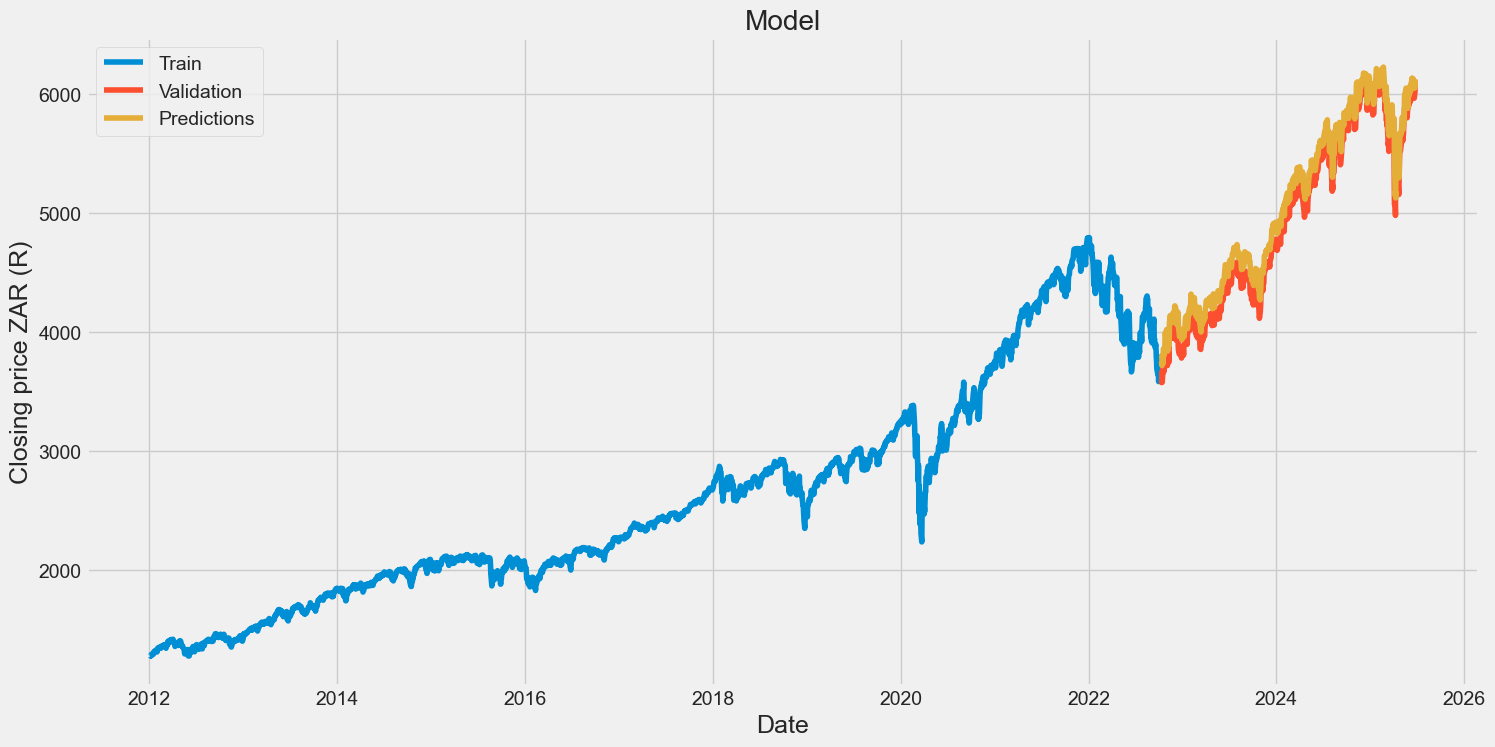

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions

#visualization the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Closing price ZAR (R)",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'],loc='best')
plt.show()

In [21]:
#Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,^GSPC,
Date,,
2022-10-11,3588.840088,3752.735840
2022-10-12,3577.030029,3731.044189
2022-10-13,3669.909912,3719.849365
2022-10-14,3583.070068,3806.627441
2022-10-17,3677.949951,3736.527344
...,...,...
2025-06-17,5982.720215,6126.808105
2025-06-18,5980.870117,6063.146973


<h2>Creating a Quote</h2>

In [23]:

#Get the quote
comp_quote = yf.download("SOL.JO", start="2012-01-01", end="2025-06-25")
#create  new data frame
new_df = comp_quote[['Close']]
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0-1
last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list
X_test = []
#append the last 60 days to x_test
X_test.append(last_60_days_scaled)
#convert x_test to numpy array
X_test = np.array(X_test)
#reshape
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

C:\Users\ethan\AppData\Local\Temp\ipykernel_10760\4285105828.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  comp_quote = yf.download("SOL.JO", start="2012-01-01", end="2025-06-25")
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[7114.9736]]
